In [55]:
import pandas as pd
import matplotlib.pyplot as plt

In [56]:
df = pd.read_csv('Data/Minnesota.csv', low_memory=False)

First glance of the data:

In [57]:
df.head()

,raw_row_number,date,time,lat,lng,police_grid_number,subject_age,subject_race,subject_sex,type,citation_issued,outcome,frisk_performed,search_conducted,search_vehicle,raw_race_of_driver
0,93569,2001-01-01,01:13:00,44.981102,-93.020193,39,NaN,white,male,vehicular,False,NaN,False,False,False,White
1,93570,2001-01-01,01:14:00,44.959361,-93.141547,87,NaN,black,male,vehicular,False,NaN,True,False,False,Black
2,93571,2001-01-01,01:47:00,44.959163,-93.071815,94,NaN,hispanic,male,vehicular,False,NaN,False,False,False,Hispanic
3,93572,2001-01-01,02:22:00,44.960154,-93.091979,92,NaN,asian/pacific islander,male,vehicular,False,NaN,True,True,True,Asian
4,93581,2001-01-01,15:01:00,44.959361,-93.141547,87,NaN,black,male,vehicular,False,NaN,True,True,True,Black


In [58]:
df.shape #675156 rows, 16 columns

(675156, 16)

Check for columns with only NaN entries:

In [59]:
df.isnull().sum()

raw_row_number             0
date                       0
time                       0
lat                      167
lng                      167
police_grid_number         0
subject_age           585849
subject_race          117994
subject_sex           106825
type                       0
citation_issued            3
outcome               581601
frisk_performed            0
search_conducted           0
search_vehicle             0
raw_race_of_driver         0
dtype: int64

To examine a subset of columns:

In [60]:
df[['date', 'time']].isnull().sum()

date    0
time    0
dtype: int64

Apparently, there is no column with only NaN entries since no column has `.isnull().sum()` equal to total no. of rows. Therefore, it is not advisable to remove any column with `df.drop('column_name', axis = 'columns', inplace=True)`. However, I will drop all rows where the race cannot be determined.

In [61]:
df.dropna(subset=['subject_race'], inplace=True)

In [62]:
df.shape #no rows are dopped

(557162, 16)

Check if data types make sense:

In [63]:
df.dtypes #all ok

raw_row_number         object
date                   object
time                   object
lat                   float64
lng                   float64
police_grid_number      int64
subject_age           float64
subject_race           object
subject_sex            object
type                   object
citation_issued        object
outcome                object
frisk_performed          bool
search_conducted         bool
search_vehicle           bool
raw_race_of_driver     object
dtype: object

Obviously, 'citation_issued' is supposed to be boolean instead of string. Lets change that:

In [64]:
df['citation_issued'] = df.citation_issued.astype('bool')

In [65]:
df['citation_issued'].dtype

dtype('bool')

'raw_race_of_driver' column is supposedly a category. When assigning the category data type, Python will automatically do things such as logically sort values, i.e. it is better to change the data type to categorical instead of object. 

In [66]:
df.raw_race_of_driver.unique() #not categorical ->convert

array(['White', 'Black', 'Hispanic', 'Asian', 'Native American'],
      dtype=object)

In [67]:
cats = [category for category in df.raw_race_of_driver.unique()]
cats

['White', 'Black', 'Hispanic', 'Asian', 'Native American']

In [68]:
df['raw_race_of_driver'] = df.raw_race_of_driver.astype(pd.api.types.CategoricalDtype(categories = cats, ordered=True))
df.raw_race_of_driver.unique()

[White, Black, Hispanic, Asian, Native American]
Categories (5, object): [White < Black < Hispanic < Asian < Native American]

Combine 'date' and 'time' columns into a single 'date_and_time' column and set the new column as the index to allow for easy time-specific filtering:

In [69]:
date_and_time = df['date'].str.cat(df['time'], sep=' ') 
#because dtype of date and time is object i.e. string, we can use .cat str-method

In [70]:
df['date_and_time'] = pd.to_datetime(date_and_time) #add it as new column to the df
print(df.columns)

Index(['raw_row_number', 'date', 'time', 'lat', 'lng', 'police_grid_number',
       'subject_age', 'subject_race', 'subject_sex', 'type', 'citation_issued',
       'outcome', 'frisk_performed', 'search_conducted', 'search_vehicle',
       'raw_race_of_driver', 'date_and_time'],
      dtype='object')


In [71]:
df.set_index('date_and_time', inplace=True)
df.head()

,raw_row_number,date,time,lat,lng,police_grid_number,subject_age,subject_race,subject_sex,type,citation_issued,outcome,frisk_performed,search_conducted,search_vehicle,raw_race_of_driver
date_and_time,,,,,,,,,,,,,,,,
2001-01-01 01:13:00,93569,2001-01-01,01:13:00,44.981102,-93.020193,39,NaN,white,male,vehicular,False,NaN,False,False,False,White
2001-01-01 01:14:00,93570,2001-01-01,01:14:00,44.959361,-93.141547,87,NaN,black,male,vehicular,False,NaN,True,False,False,Black
2001-01-01 01:47:00,93571,2001-01-01,01:47:00,44.959163,-93.071815,94,NaN,hispanic,male,vehicular,False,NaN,False,False,False,Hispanic
2001-01-01 02:22:00,93572,2001-01-01,02:22:00,44.960154,-93.091979,92,NaN,asian/pacific islander,male,vehicular,False,NaN,True,True,True,Asian
2001-01-01 15:01:00,93581,2001-01-01,15:01:00,44.959361,-93.141547,87,NaN,black,male,vehicular,False,NaN,True,True,True,Black


In [72]:
print(df.index)

DatetimeIndex(['2001-01-01 01:13:00', '2001-01-01 01:14:00',
               '2001-01-01 01:47:00', '2001-01-01 02:22:00',
               '2001-01-01 15:01:00', '2001-01-01 03:04:00',
               '2001-01-01 03:10:00', '2001-01-01 15:22:00',
               '2001-01-01 03:30:00', '2001-01-01 15:33:00',
               ...
               '2015-12-31 11:38:00', '2015-12-31 11:39:00',
               '2015-12-31 11:46:00', '2015-12-31 11:47:00',
               '2015-12-31 11:59:00', '2015-12-31 12:02:00',
               '2015-12-31 00:03:00', '2015-12-31 00:16:00',
               '2015-12-31 00:40:00', '2015-12-31 00:58:00'],
              dtype='datetime64[ns]', name='date_and_time', length=557162, freq=None)


Extract the year

In [73]:
df['year'] = df['date'].str[0:4]
df['year'] = df['year'].astype(int)

Lets start with some analysis:

In [74]:
df.raw_race_of_driver.value_counts(dropna=False) 
#even though there are no NaN entries, we see that 'No Data' matches sum of NaN in column 'subject_race'

White              265143
Black              188761
Asian               54904
Hispanic            43062
Native American      5292
Name: raw_race_of_driver, dtype: int64

In [75]:
df.raw_race_of_driver.value_counts(normalize=True, dropna=False) #relative proportions

White              0.475881
Black              0.338790
Asian              0.098542
Hispanic           0.077288
Native American    0.009498
Name: raw_race_of_driver, dtype: float64

For better overview, lets create a frequency table:

In [76]:
frequency_table= pd.crosstab(df['raw_race_of_driver'], df['subject_sex'])
frequency_table

subject_sex,female,male
raw_race_of_driver,,
White,97535,167417
Black,55064,133331
Hispanic,9096,33927
Asian,13882,40966
Native American,1872,3387


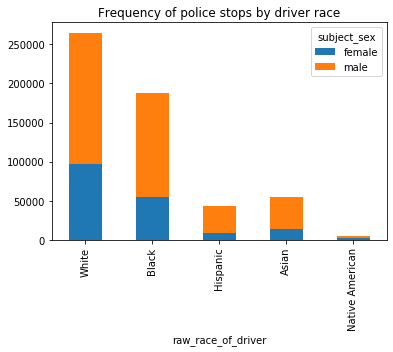

In [77]:
frequency_table.plot(kind='bar', stacked=True, title='Frequency of police stops by driver race', label='gender')

Create a column with dtype boolean when race is equal to 'black':

In [78]:
mapping = {'Black': True, 'White': False, 'No Data': False, 'Asian': False, 'Hispanic': False, 'Native American': False}

In [79]:
df['is_black'] = df['raw_race_of_driver'].map(mapping)
df[['is_black', 'raw_race_of_driver']].head()

,is_black,raw_race_of_driver
date_and_time,,
2001-01-01 01:13:00,False,White
2001-01-01 01:14:00,True,Black
2001-01-01 01:47:00,False,Hispanic
2001-01-01 02:22:00,False,Asian
2001-01-01 15:01:00,True,Black


In [80]:
df['is_black'].dtype

dtype('bool')

How often are frisks/searches actually done?

In [81]:
df.frisk_performed.value_counts(normalize=True) #most of times there is no frisk performed

False    0.896355
True     0.103645
Name: frisk_performed, dtype: float64

In [82]:
df.search_conducted.value_counts(normalize=True) #most of times there is no search performed; and searches occur less often

False    0.922687
True     0.077313
Name: search_conducted, dtype: float64

How often is a frisk followed by a search of the vehicle?

In [83]:
df['frisked_and_searched'] = df.search_conducted & df.frisk_performed
df[['frisk_performed', 'search_conducted', 'frisked_and_searched']].head(5)

,frisk_performed,search_conducted,frisked_and_searched
date_and_time,,,
2001-01-01 01:13:00,False,False,False
2001-01-01 01:14:00,True,False,False
2001-01-01 01:47:00,False,False,False
2001-01-01 02:22:00,True,True,True
2001-01-01 15:01:00,True,True,True


In [84]:
df.frisked_and_searched.value_counts(normalize=True)

False    0.924485
True     0.075515
Name: frisked_and_searched, dtype: float64

There are several ways to analyse e.g. if frisk_performed is different for various races:

In [85]:
frisk_rate = df.groupby(['raw_race_of_driver']).frisk_performed.mean() #1
frisk_rate

raw_race_of_driver
White              0.070200
Black              0.150863
Hispanic           0.139798
Asian              0.076370
Native American    0.083900
Name: frisk_performed, dtype: float64

In [86]:
df.groupby(['is_black']).frisk_performed.mean() #2

is_black
False    0.079451
True     0.150863
Name: frisk_performed, dtype: float64

In [87]:
df[df['raw_race_of_driver'] == 'Black'].frisk_performed.mean() #3

0.15086273117858032

You can also do a groupby statement with multiple columns:

In [88]:
df.groupby(['raw_race_of_driver', 'subject_sex']).frisk_performed.mean()

raw_race_of_driver  subject_sex
White               female         0.032327
                    male           0.092177
Black               female         0.050214
                    male           0.192146
Hispanic            female         0.046504
                    male           0.164824
Asian               female         0.019162
                    male           0.095616
Native American     female         0.059829
                    male           0.097136
Name: frisk_performed, dtype: float64

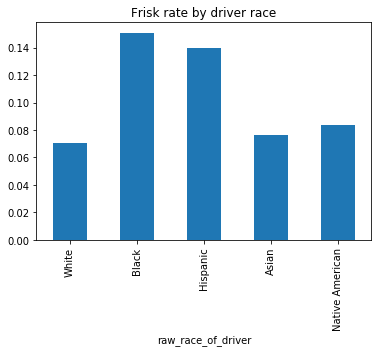

In [89]:
frisk_rate.plot(kind='bar', title='Frisk rate by driver race')

In [90]:
search_rate = df.groupby(['raw_race_of_driver']).search_conducted.mean()
search_rate

raw_race_of_driver
White              0.052277
Black              0.114965
Hispanic           0.097464
Asian              0.054440
Native American    0.061980
Name: search_conducted, dtype: float64

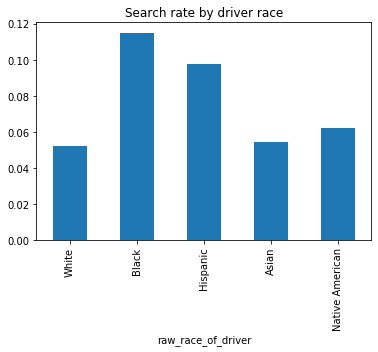

In [91]:
search_rate.plot(kind='bar', title='Search rate by driver race')

In [92]:
frisk_and_searched_rate = df.groupby(['raw_race_of_driver']).frisked_and_searched.mean()
frisk_and_searched_rate

raw_race_of_driver
White              0.050799
Black              0.112640
Hispanic           0.095351
Asian              0.053202
Native American    0.059713
Name: frisked_and_searched, dtype: float64

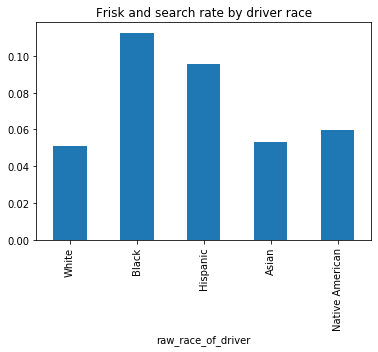

In [93]:
frisk_and_searched_rate.plot(kind='bar', title='Frisk and search rate by driver race')

The data shows that a) blacks are being frisked/searched more than twice as often than e.g. whites and b) that males of all races get frisked/searched more often than females.

One could argue that the increased frequency for blacks being frisked is because there are more blacks than e.g. whites in the overall sample. However, we have already shown above that this is not the case. In fact, there are 40% more white people in the sample than black people.

Bottom line: there is a correlation between being black and being stopped & frisked / searched. However, I cannot draw any conclusions about causation since I would need additional data and expertise for that. 

Since our data is also a time series, we can inspect the frisks and searches over time:

In [94]:
frisk_trend = df.groupby(['year']).frisk_performed.mean() #for this we need the previously added 'year' column 
frisk_trend

year
2001    0.105946
2002    0.098413
2003    0.097661
2004    0.105500
2005    0.115576
2006    0.152960
2007    0.174571
2008    0.157712
2009    0.137141
2010    0.105629
2011    0.092641
2012    0.072472
2013    0.068739
2014    0.065575
2015    0.058582
2016    0.035465
Name: frisk_performed, dtype: float64

However, since our index is a datetime object, we can simply `.resample` the data:

In [95]:
df.frisk_performed.resample('A').mean()

date_and_time
2001-12-31    0.105946
2002-12-31    0.098413
2003-12-31    0.097661
2004-12-31    0.105500
2005-12-31    0.115576
2006-12-31    0.152960
2007-12-31    0.174571
2008-12-31    0.157712
2009-12-31    0.137141
2010-12-31    0.105629
2011-12-31    0.092641
2012-12-31    0.072472
2013-12-31    0.068739
2014-12-31    0.065575
2015-12-31    0.058582
2016-12-31    0.035465
Freq: A-DEC, Name: frisk_performed, dtype: float64

In [96]:
pivot_table = df.pivot_table(index='year', columns='raw_race_of_driver', values='frisk_performed')

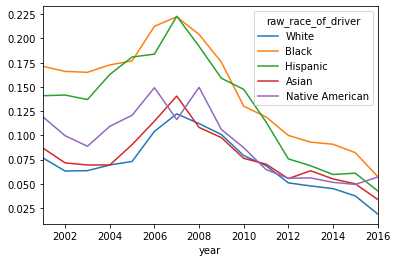

In [97]:
pivot_table.plot()

In [98]:
comparison_pt = pivot_table.loc[:, 'White':'Black']
comparison_pt

raw_race_of_driver,White,Black
year,,
2001,0.076731,0.171292
2002,0.063174,0.166011
2003,0.063573,0.165088
2004,0.069405,0.172747
2005,0.073053,0.176860
2006,0.104085,0.212591
2007,0.122231,0.222410
2008,0.112118,0.204170
2009,0.100839,0.175522


In [99]:
trend = df.groupby(['is_black', 'year']).frisk_performed.mean() #check
trend

is_black  year
False     2001    0.084056
          2002    0.072200
          2003    0.071872
          2004    0.079646
          2005    0.088532
          2006    0.117713
          2007    0.141648
          2008    0.125000
          2009    0.108931
          2010    0.087938
          2011    0.074842
          2012    0.054792
          2013    0.053683
          2014    0.049087
          2015    0.043704
          2016    0.024492
True      2001    0.171292
          2002    0.166011
          2003    0.165088
          2004    0.172747
          2005    0.176860
          2006    0.212591
          2007    0.222410
          2008    0.204170
          2009    0.175522
          2010    0.130114
          2011    0.119070
          2012    0.099942
          2013    0.092979
          2014    0.090820
          2015    0.082114
          2016    0.057561
Name: frisk_performed, dtype: float64

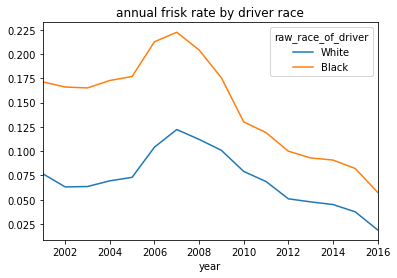

In [100]:
comparison_pt.plot(title ='annual frisk rate by driver race')
plt.show()

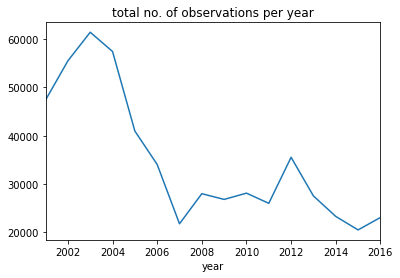

In [101]:
df2 = df.groupby(['year']).count()
counts = df2['raw_row_number']
counts.plot(title='total no. of observations per year')

The last graph shows that a high no. of annual frisks is not due to a high number of annual stops. Clearly, the annual frisk rate peaked in 2007 at a point where total. no. of observations were low. I.e. the high frisk rate is not due to a high amount of police stops. Also, the frisk rate seems to follow a downward trend since its peak in 2007, whereas total no. of police stops remained rather flat.